In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
iris = pd.read_excel('../../Data/Iris.xls', ecoding='utf-8')

In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


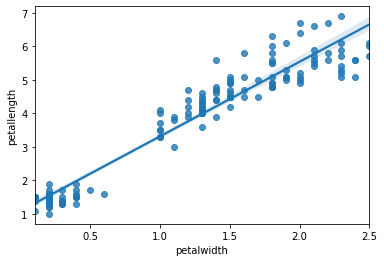

In [4]:
sns.regplot(data=iris, x='petalwidth', y='petallength')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


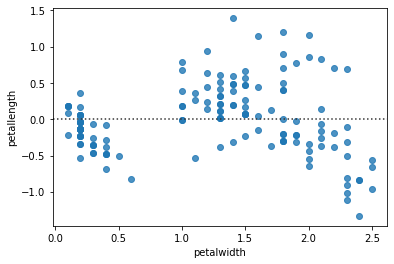

In [5]:
sns.residplot(iris.petalwidth, iris.petallength)
plt.show()

In [6]:
X = iris[['petalwidth']]
y = iris['petallength']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
intercept = model.intercept_ #b
slope = model.coef_[0] #m model.coef_: array[m1, m2, m3,...]

In [11]:
print(intercept, slope)

1.1119678278650347 2.2219249689412517


In [12]:
model.score(X, y)

0.9268086635694383

In [13]:
model.score(X_train, y_train)

0.9216202233661854

In [14]:
model.score(X_test, y_test)

0.9396218510182043

#### Model dự đoán được 92% petallength dựa trên petalwidth

In [15]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

0.20497336251255566


In [16]:
mae = mean_absolute_error(y_pred, y_test)
print(mae)

0.3506087650492487


#### MSE, MAE thấp cho thấy sự chênh lệch không đáng kể giữa y dữ đoán và y thực tế

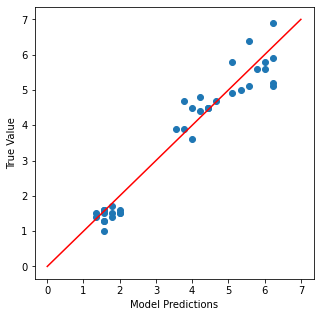

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
# Dự vào range min max của cột target
plt.plot([0, 7], [0, 7], 'k-', color='r')
plt.show()

In [18]:
petal_width = 1.5
petal_length = slope * petal_width + intercept
print("Predicted length:", petal_length)

Predicted length: 4.4448552812769115
